In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Provided data
data = {
    'Channel': ['1:1 Session', '1:1 Session', '1:1 Session', '1:1 Session',
                'Social Media Marketing', 'Social Media Marketing', 'Social Media Marketing', 'Social Media Marketing',
                'Email Marketing', 'Email Marketing', 'Email Marketing', 'Email Marketing',
                'ZoomCamp', 'ZoomCamp', 'ZoomCamp', 'ZoomCamp',
                'Website Funnel', 'Website Funnel', 'Website Funnel', 'Website Funnel'],
    'Segment': ['Cybersecurity', 'Cloud Computing Services', 'Data Science and Analytics', 'User Experience (UX) Design',
                'Cybersecurity', 'Cloud Computing Services', 'Data Science and Analytics', 'User Experience (UX) Design',
                'Cybersecurity', 'Data Science and Analytics', 'User Experience (UX) Design', 'Cloud Computing Services',
                'Cybersecurity', 'Cloud Computing Services', 'Data Science and Analytics', 'User Experience (UX) Design',
                'Cybersecurity', 'Cloud Computing Services', 'Data Science and Analytics', 'User Experience (UX) Design'],
    'Qualified Reach': [1764, 268, 219, 149, 1434, 234, 137, 76, 5134, 438, 391, 379, 296, 34, 58, 13, 134, 92, 60, 0],
    'QR YTD? (Growth %)': ['161%', '-19%', '55%', '-70%', '121%', '127%', '155%', '-20%', '-27%', '66%', '-17%', '27%', '21%', '27%', '-47%', '-87%', '-49%', '127%', '55%', '0.00%'],
    'Qualified Conversion %': ['44%', '35%', '30%', '8%', '84%', '82%', '60%', '98%', '20%', '46%', '38%', '31%', '84%', '62%', '30%', '68%', '100%', '100%', '100%', '0.00%'],
    'Reach conversion per QR': [776.16, 93.8, 65.7, 11.92, 1204.56, 191.88, 82.2, 74.48, 1026.8, 201.48, 148.58, 117.49, 248.64, 21.08, 17.4, 8.84, 134, 92, 60, 0]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)


                   Channel                      Segment  Qualified Reach  \
0              1:1 Session                Cybersecurity             1764   
1              1:1 Session     Cloud Computing Services              268   
2              1:1 Session   Data Science and Analytics              219   
3              1:1 Session  User Experience (UX) Design              149   
4   Social Media Marketing                Cybersecurity             1434   
5   Social Media Marketing     Cloud Computing Services              234   
6   Social Media Marketing   Data Science and Analytics              137   
7   Social Media Marketing  User Experience (UX) Design               76   
8          Email Marketing                Cybersecurity             5134   
9          Email Marketing   Data Science and Analytics              438   
10         Email Marketing  User Experience (UX) Design              391   
11         Email Marketing     Cloud Computing Services              379   
12          

<ipython-input-2-234bb70df5f8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Channel', y='Qualified Reach', data=df, ci=None, palette='viridis')
<ipython-input-2-234bb70df5f8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Channel', y='QR YTD? (Growth %)', data=df, ci=None, palette='magma')
<ipython-input-2-234bb70df5f8>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Channel', y='Qualified Conversion %', data=df, ci=None, palette='plasma')
<ipython-input-2-234bb70df5f8>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Channel', y='Reach conversion per QR', data=df, ci=None, palette='inferno')


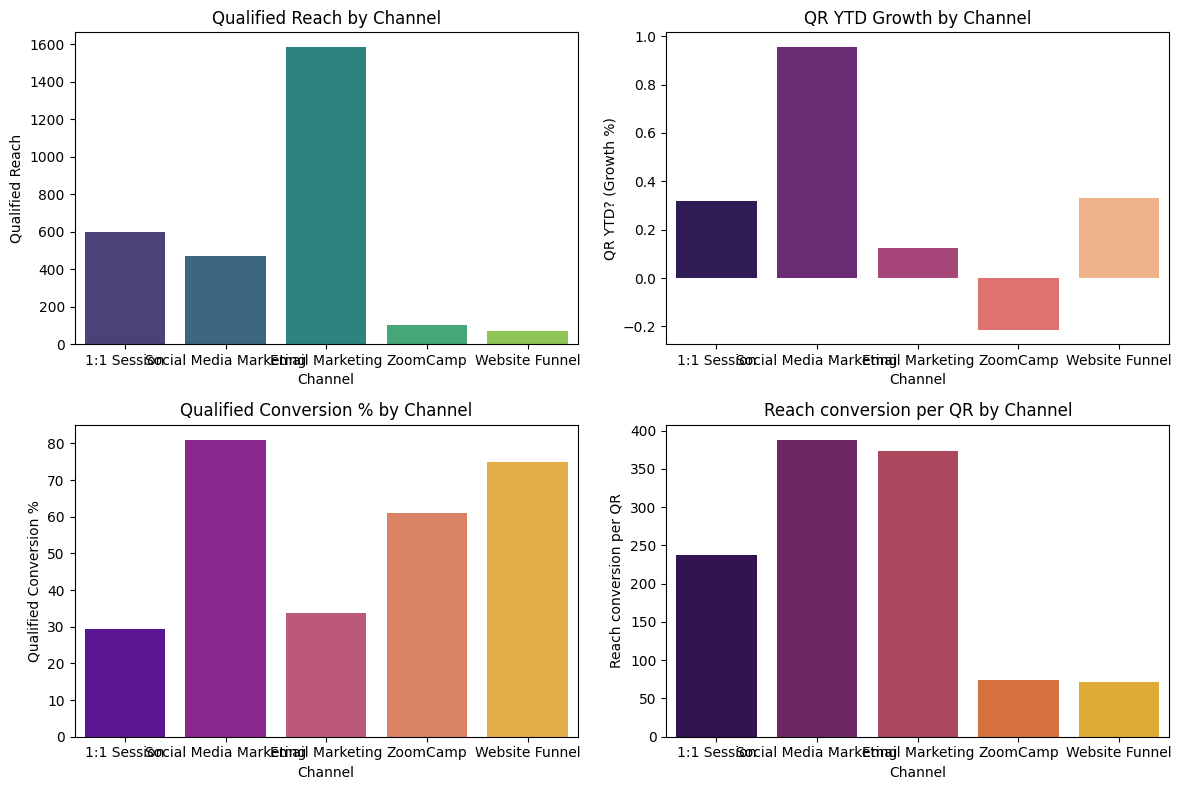

In [ ]:

# 6.2 Data Analysis
## 6.2.1 Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Channel', y='Qualified Reach', data=df, ci=None, palette='viridis')
plt.title('Qualified Reach by Channel')
plt.subplot(2, 2, 2)
df['QR YTD? (Growth %)'] = df['QR YTD? (Growth %)'].str.rstrip('%').astype('float') / 100.0
sns.barplot(x='Channel', y='QR YTD? (Growth %)', data=df, ci=None, palette='magma')
plt.title('QR YTD Growth by Channel')
plt.subplot(2, 2, 3)
df['Qualified Conversion %'] = df['Qualified Conversion %'].str.rstrip('%').astype('float')
sns.barplot(x='Channel', y='Qualified Conversion %', data=df, ci=None, palette='plasma')
plt.title('Qualified Conversion % by Channel')
plt.subplot(2, 2, 4)
sns.barplot(x='Channel', y='Reach conversion per QR', data=df, ci=None, palette='inferno')
plt.title('Reach conversion per QR by Channel')
plt.tight_layout()
plt.show()


In [ ]:

## 6.2.2 Descriptive Statistics
descriptive_stats = df.describe()
print(descriptive_stats)


       Qualified Reach  QR YTD? (Growth %)  Qualified Conversion %  \
count        20.000000           20.000000               20.000000   
mean        565.500000            0.303000               56.000000   
std        1168.944215            0.759661               32.227808   
min           0.000000           -0.870000                0.000000   
25%          72.000000           -0.217500               30.750000   
50%         184.000000            0.240000               53.000000   
75%         382.000000            0.797500               84.000000   
max        5134.000000            1.610000              100.000000   

       Reach conversion per QR  
count                20.000000  
mean                228.850500  
std                 347.303647  
min                   0.000000  
25%                  50.270000  
50%                  92.900000  
75%                 194.280000  
max                1204.560000  


In [ ]:

## 6.2.3 Inferential Statistics
group1 = df[df['Channel'] == '1:1 Session']['Qualified Conversion %']
group2 = df[df['Channel'] == 'Social Media Marketing']['Qualified Conversion %']
t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)
print(f'T-Statistic: {t_statistic}\nP-Value: {p_value}')


T-Statistic: -4.71960264297822
P-Value: 0.003265102676160696


In [ ]:

# 6.3 Decision-Making Models
## 6.3.1 Machine Learning Models
X = df[['Qualified Reach', 'Qualified Conversion %']]
y = df['Reach conversion per QR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print('\nCoefficients:\n', coefficients)


Mean Squared Error: 31370.615769392865

Coefficients:
                  Variable  Coefficient
0         Qualified Reach     0.238408
1  Qualified Conversion %     2.876651


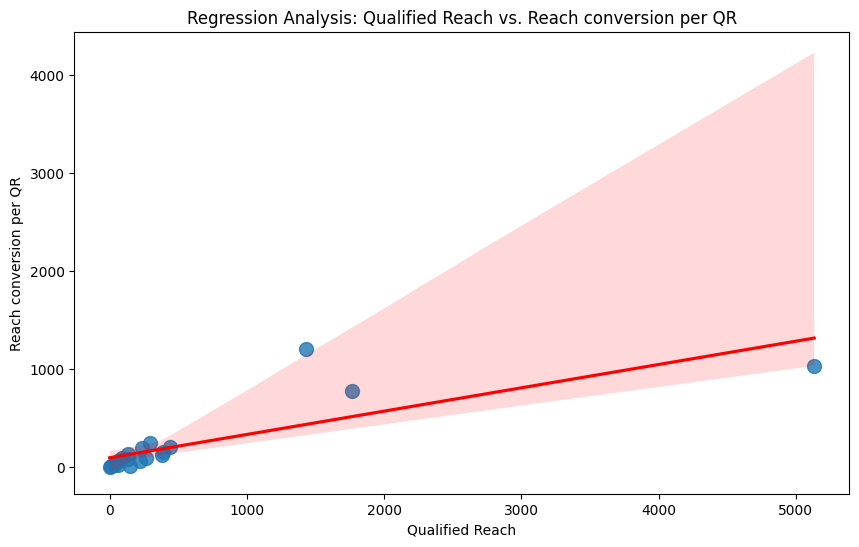

In [ ]:

## 6.3.2 Regression Analysis
plt.figure(figsize=(10, 6))
sns.regplot(x='Qualified Reach', y='Reach conversion per QR', data=df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title('Regression Analysis: Qualified Reach vs. Reach conversion per QR')
plt.xlabel('Qualified Reach')
plt.ylabel('Reach conversion per QR')
plt.show()



In [ ]:
#Recommendation
# Identify the segment and channel with the highest 'Reach conversion per QR'
max_reach_conversion = df[df['Reach conversion per QR'] == df['Reach conversion per QR'].max()]
print(f"The segment and channel with the highest 'Reach conversion per QR' are:\n{max_reach_conversion[['Segment', 'Channel', 'Reach conversion per QR']]}")


The segment and channel with the highest 'Reach conversion per QR' are:
         Segment                 Channel  Reach conversion per QR
4  Cybersecurity  Social Media Marketing                  1204.56


In [ ]:
#Business Implications
# Recommend focusing marketing efforts on segments or channels with higher conversion rates
high_conversion_segments = df.groupby('Segment')['Reach conversion per QR'].mean().sort_values(ascending=False).head(2).index
high_conversion_channels = df.groupby('Channel')['Reach conversion per QR'].mean().sort_values(ascending=False).head(2).index

print(f"Considering higher conversion rates, it is recommended to focus marketing efforts on the following:\n"
      f"Top 2 segments: {', '.join(high_conversion_segments)}\n"
      f"Top 2 channels: {', '.join(high_conversion_channels)}")


Considering higher conversion rates, it is recommended to focus marketing efforts on the following:
Top 2 segments: Cybersecurity, Cloud Computing Services
Top 2 channels: Social Media Marketing, Email Marketing


In [ ]:
# Identify potential risks, e.g., oversaturation in highly targeted segments
risk_segments = df[df['Qualified Reach'] > 1000]['Segment'].unique()
print(f"Potential risk: Oversaturation in highly targeted segments, such as {', '.join(risk_segments)}")


Potential risk: Oversaturation in highly targeted segments, such as Cybersecurity
